In [1]:
import pickle
from zipfile import ZipFile
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
with ZipFile('data/9_way_dataset.zip', 'r') as zip:
    zip.printdir()
    zip.extractall(path='/home/jipe/E208-Final-Project/data')

with ZipFile('data/100_way_dataset.zip', 'r') as zip:
    zip.printdir()
    zip.extractall(path='/home/jipe/E208-Final-Project/data')

File Name                                             Modified             Size
9_way_dataset.pkl                              2023-10-19 21:18:44    161593492
File Name                                             Modified             Size
100_way_dataset.pkl                            2023-10-19 21:20:32    400855173


In [3]:
with open('data/9_way_dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [24]:
testarr = np.array(data[0][0])
testarr = np.append(testarr, np.zeros((64, 2)), axis=1)

print(testarr.shape)

(64, 64)


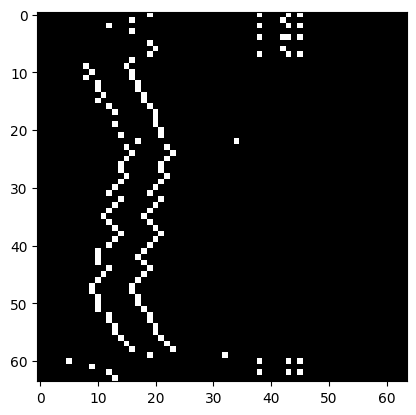

In [25]:
plt.imshow(testarr, cmap=cm.Greys_r)
plt.show()

In [30]:
seq_representation = []

for i in range(testarr.shape[0]):
    word = []
    for j in range(0, testarr.shape[1], 8):
        word.append(testarr[i,j:j+8])
    seq_representation.append(word)

8


In [ ]:
sentence = []

for datum in data[0]:
    for i in range(datum.shape[0]):
        word = []
        for j in range(0, datum.shape[1], 8):
            word.append(testarr[i,j:j+8])
        seq_representation.append(word)

In [23]:
# creates a unicode encoding map of the first 256 utf-8 chars

encoding_map = {}

for i in range(256):
    encoding_map[i] = chr(i)

{0: '\x00', 1: '\x01', 2: '\x02', 3: '\x03', 4: '\x04', 5: '\x05', 6: '\x06', 7: '\x07', 8: '\x08', 9: '\t', 10: '\n', 11: '\x0b', 12: '\x0c', 13: '\r', 14: '\x0e', 15: '\x0f', 16: '\x10', 17: '\x11', 18: '\x12', 19: '\x13', 20: '\x14', 21: '\x15', 22: '\x16', 23: '\x17', 24: '\x18', 25: '\x19', 26: '\x1a', 27: '\x1b', 28: '\x1c', 29: '\x1d', 30: '\x1e', 31: '\x1f', 32: ' ', 33: '!', 34: '"', 35: '#', 36: '$', 37: '%', 38: '&', 39: "'", 40: '(', 41: ')', 42: '*', 43: '+', 44: ',', 45: '-', 46: '.', 47: '/', 48: '0', 49: '1', 50: '2', 51: '3', 52: '4', 53: '5', 54: '6', 55: '7', 56: '8', 57: '9', 58: ':', 59: ';', 60: '<', 61: '=', 62: '>', 63: '?', 64: '@', 65: 'A', 66: 'B', 67: 'C', 68: 'D', 69: 'E', 70: 'F', 71: 'G', 72: 'H', 73: 'I', 74: 'J', 75: 'K', 76: 'L', 77: 'M', 78: 'N', 79: 'O', 80: 'P', 81: 'Q', 82: 'R', 83: 'S', 84: 'T', 85: 'U', 86: 'V', 87: 'W', 88: 'X', 89: 'Y', 90: 'Z', 91: '[', 92: '\\', 93: ']', 94: '^', 95: '_', 96: '`', 97: 'a', 98: 'b', 99: 'c', 100: 'd', 101: 'e'